In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from ffs import FFS
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

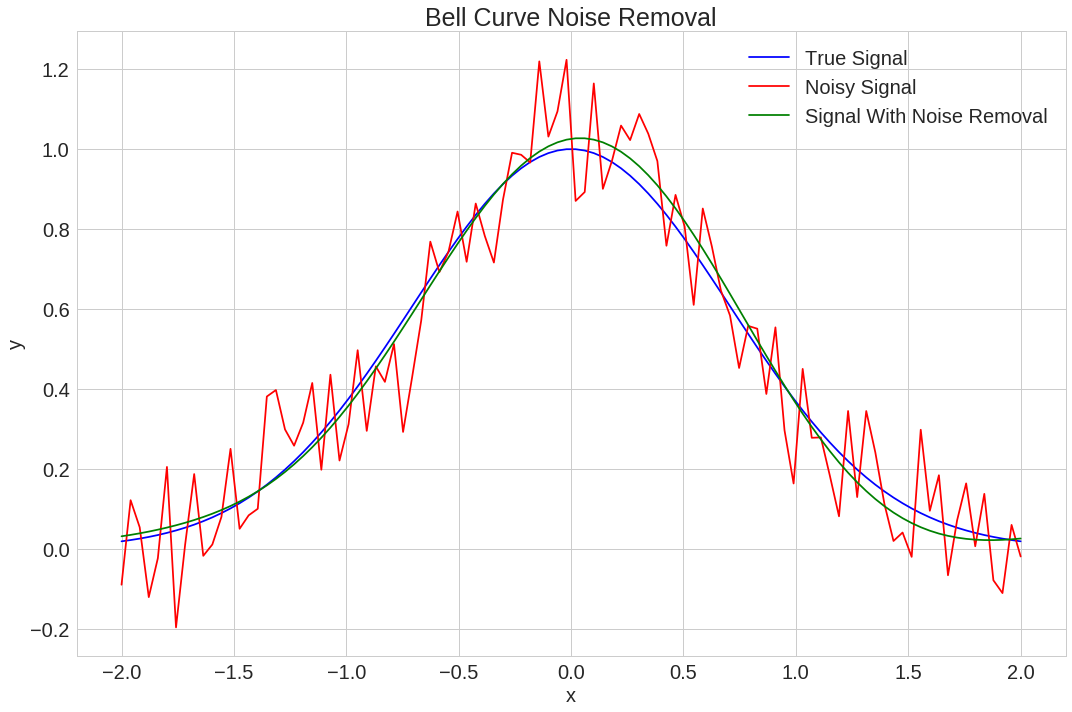

In [32]:
num_points = 100
np.random.seed(123)
x = np.linspace(-2,2,num_points)
y = np.exp(-x**2)

# amplitude = 0.1*(np.max(y) - np.min(y))
amplitude = 0.1
noise = amplitude*np.random.normal(loc=0, scale=1, size=num_points)
y_noise = y + noise

fs = FFS(x, y_noise, pad=1)

yt = fft(y_noise)
yt = 2*np.absolute(yt[1:len(yt)/2])/(len(y))

plt.figure(figsize=(15,10))

# plt.subplot(2,1,1)
plt.plot(x, y,'b',label="True Signal")
plt.plot(x, y_noise,'r',label="Noisy Signal")
plt.plot(x, fs.evaluate(x,3), 'g', label="Signal With Noise Removal")
plt.xlabel('x', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('y', fontsize=20)
plt.yticks(fontsize=20)
plt.title("Bell Curve Noise Removal", fontsize=25)
plt.legend(loc = 'upper right', prop={'size':20})

# plt.subplot(2,1,2)
# plt.stem(range(1,len(yt)+1), np.abs(yt))
# plt.xticks(range(1,len(yt)+1))
# plt.xlabel("Harmonic Wave Number", fontsize = 20)
# plt.ylabel("Wave Amplitude", fontsize = 20)
# plt.title("Signal Wave Harmonics and Amplitudes", fontsize=25)
# plt.axhline(y=thresh*np.max(yt), color='r', linestyle='-',label="Cutoff Threshold")
# plt.legend(loc = 'upper right', prop={'size':20})

plt.tight_layout()
plt.savefig('images/noise_removal/bell_curve_noise_removal.png')
plt.show()

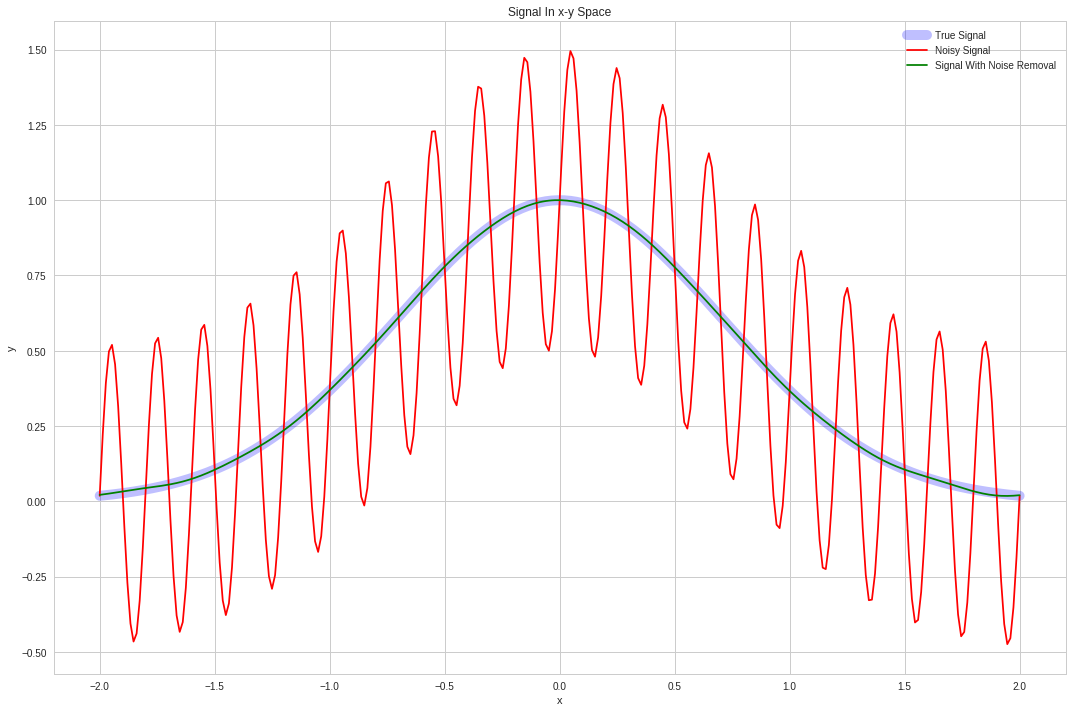

In [3]:
num_points = 300

xa = -2
xb = 2
L = xb - xa

x = np.linspace(xa,xb,num_points)
y = np.exp(-x**2)
omega = 2*np.pi/L
wave_number = 20
amplitude = 0.5
noise = amplitude*np.sin(wave_number*omega*(x-xa))
y_noise = y + noise
fs = FFS(x, y_noise)

yt = fft(y_noise)
yyt = yt.copy()
yyt[3:-1] = np.complex(0,0)
# yt = 2*np.absolute(yt[1:len(yt)/2])/(len(y)-1)
yt = 2*np.absolute(yt[1:len(yt)/2])/(len(y))

plt.figure(figsize=(15,10))

# plt.subplot(2,1,1)
plt.plot(x, y,'b',label="True Signal",linewidth=10, alpha=0.25)
plt.plot(x, y_noise,'r',label="Noisy Signal")
# plt.plot(x, ifft(yyt), 'g')
plt.plot(x, fs.evaluate(x, 10), 'g', label="Signal With Noise Removal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Signal In x-y Space")
plt.legend()

# plt.subplot(2,1,2)
# plt.stem(range(1,51), np.abs(yt[:50]))
# plt.xticks(range(1,51))
# plt.xlabel("Harmonic Wave Number")
# plt.ylabel("Wave Amplitude")
# plt.title("Wave Representation of Signal")

plt.tight_layout()
plt.show()

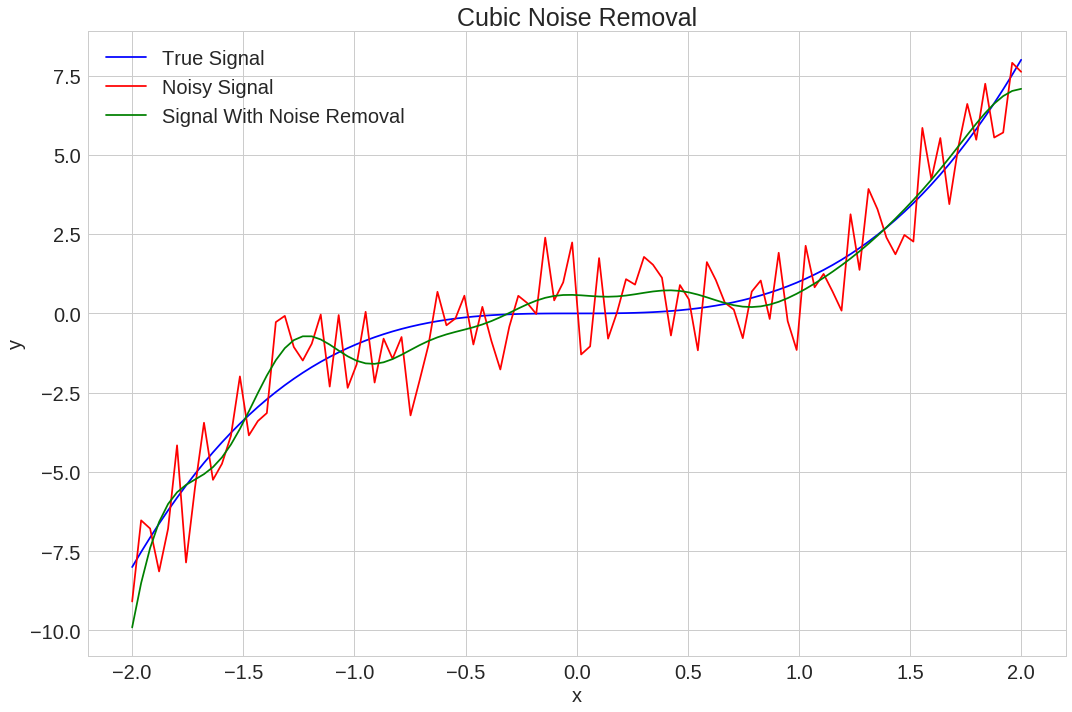

In [55]:
num_points = 100
np.random.seed(123)
x = np.linspace(-2,2,num_points)
y = x**3
# amplitude = 0.1*(np.max(y) - np.min(y))
amplitude = 1
noise = amplitude*np.random.normal(loc=0, scale=1, size=num_points)
y_noise = y + noise

fs = FFS(x, y_noise, pad=101)

plt.figure(figsize=(15,10))

# plt.subplot(2,1,1)
plt.plot(x, y,'b',label="True Signal")
plt.plot(x, y_noise,'r',label="Noisy Signal")
plt.plot(x, fs.evaluate(x,15), 'g', label="Signal With Noise Removal")
plt.xlabel('x', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('y', fontsize=20)
plt.yticks(fontsize=20)
plt.title("Cubic Noise Removal", fontsize=25)
plt.legend(loc = 'upper left', prop={'size':20})

# plt.subplot(2,1,2)
# plt.stem(range(1,len(yt)+1), np.abs(yt))
# plt.xticks(range(1,len(yt)+1))
# plt.xlabel("Harmonic Wave Number", fontsize = 20)
# plt.ylabel("Wave Amplitude", fontsize = 20)
# plt.title("Signal Wave Harmonics and Amplitudes", fontsize=25)
# plt.axhline(y=thresh*np.max(yt), color='r', linestyle='-',label="Cutoff Threshold")
# plt.legend(loc = 'upper right', prop={'size':20})

plt.tight_layout()
plt.savefig('images/noise_removal/cubic_noise_removal.png')
plt.show()

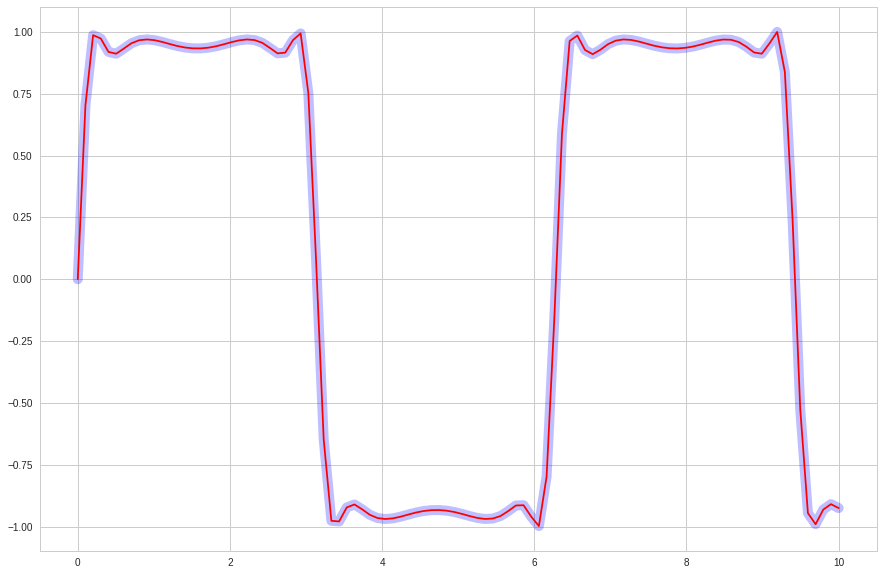

In [47]:
x = np.linspace(0,10,100)
y = np.sin(2*np.sin(2*np.sin(2*np.sin(x))))

fs = FFS(x, y, pad=1)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.plot(x,y,'b',linewidth=10,alpha=0.25)
ax.plot(x, fs.evaluate(x), 'r')

fig.show()

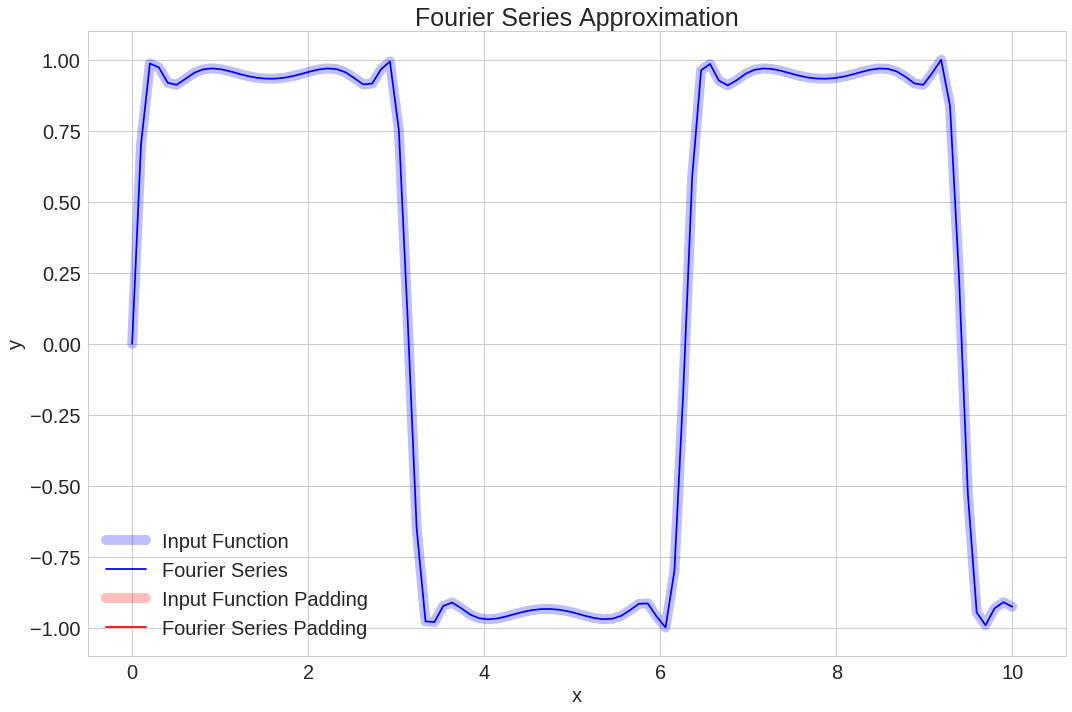

In [48]:
fs.plot_series_against_input(show_padding=True)

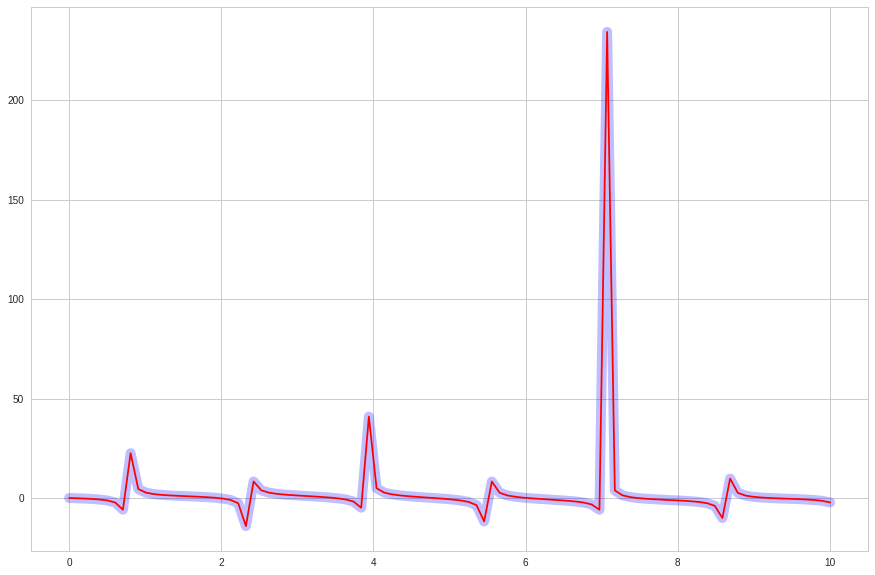

In [29]:
x = np.linspace(0,10,100)

y = np.sin(np.pi*x/5)-np.tan(x*2)

fs = FFS(x, y, pad=1)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.plot(x,y,'b',linewidth=10,alpha=0.25)
ax.plot(x, fs.evaluate(x), 'r')

fig.show()